# PHYS 3317 -- Statistical Mechanics

Please hand in this completed notebook before next week by uploading it to blackboard

<em> Vineet Kamat</em>

### The wedding cake structure of trapped atoms in an optical lattice

This is a fairly simple exercise, but it nicely illustrates how one uses partition functions.  It also illustrates a problem which is easy to do numerically but hard to do analytically.

We will think about experiments where a gas of bosonic $^{87}$Rb atoms are trapped in a periodic potential formed from interfering laser beams.  In the limit where the potential wells are very deep, one can model each site as being independent of the others (which just provide a particle and heat bath).  This is known as the "Mott" limit.

We will therefore just consider a single site.  Since it is in contact with both a thermal bath, and a particle bath, we should describe it by the Grand Canonical Ensemble.

This means that the probability of state $i$ is 

$$p_i =\frac{1}{Z} e^{-\beta (E_i-\mu N_i)}$$

where

$$Z=\sum_i e^{-\beta (E_i-\mu N_i)}$$

The spacing between single particle orbitals on a site is huge -- so it is a good approximation to assume there is only one orbital.  Therefore the state is uniquely defined by the number of particles $N$.  

A good model of the energy is that 

$$ E_N=U N (N-1)/2 + V N$$

Here $U$ is the interaction energy between two particles in the same site, and $V$ is the energy required to put a particle on a site.  You can think of $V$ as the bottom of the potential well.

In this exercise we will calculate the equation of state of this system -- that is we will find $N$ as a function of $\mu$ and $\beta$.  The interesting physics occurs at low temperatures -- so we will assume $\beta U \gg 1$.

To avoid any issues with integer division, lets start with

In [30]:
from __future__ import division

Lets also load in the graphics and math packages

In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Next, lets calculate the partition function: 

$$Z= \sum_{N=0}^\infty e^{-\beta [ U N(N-1)/2 + (V-\mu) N]}$$

This is most simply thought of as a function of the dimensionless variables <tt>betamu</tt>=$\beta U$ and <tt>dmu<tt>=$(mu-V)/U$.  

This sum cannot be calculated analytically, so we will have to do it numerically.  A good first step in numerically doing a sum is to look at the size of a few elements.  Generate a function which will make the list of the first maxN elements:  

In [60]:
def partitionelements(betaU,dmu,maxn):
    nlist=arange(maxn+1)
    Z = 0
    outlst = []
    for i in range(0,len(nlist)):
        Z = exp(-((i*(i-1)/2)-i*dmu)*betaU)
        outlst = outlst + [Z]
    return   asarray(outlst)

Plot these elements for various arguments

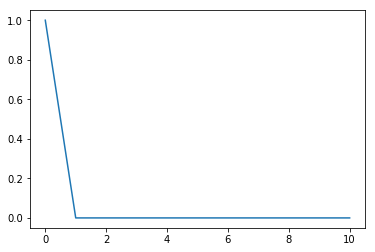

In [61]:
plot(partitionelements(betaU=10,dmu=-2,maxn=10))

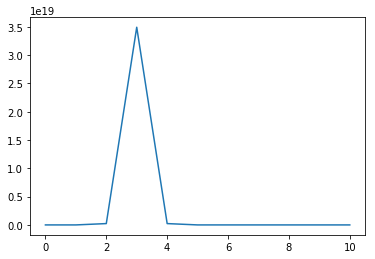

In [62]:
plot(partitionelements(betaU=10,dmu=2.5,maxn=10))

As you can see, at low temperatures, the sum seems to be dominated by a few terms.  It therefore seems reasonable to just truncate the sum, by just adding up all the terms to <tt>maxn</tt>.  We can always plot it to verify.

Once we have a list of the terms we can sum them like this.

131.2599073308353

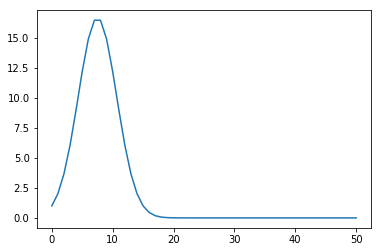

In [63]:
zterms=partitionelements(betaU=0.1,dmu=7,maxn=50) # generate the terms 
plot(zterms) # plot them
zterms.sum() # calculate the sum -- you have seen this notation before

<b>Problem 1:</b> Generate a function which gives the average $\langle N\rangle$ as a function of <tt>betaU</tt>, <tt>dmu</tt>, and <tt>maxn</tt>. 

$$\langle N\rangle=\frac{1}{Z}\sum_N N e^{-\beta[U N(N-1)/2+(V-\mu)N]}$$

In [64]:
def averageN(betaU,dmu,maxn):
    zlist = partitionelements(betaU,dmu,maxn)
    znum = []
    for i in range(0,len(zlist)):
        znum.append(zlist[i]*i)
    zlist = asarray(zlist)
    znum = asarray(znum)

    return (znum.sum())/(zlist.sum())

In [65]:
# Test it

In [66]:
averageN(10,5,50)

5.5

We can now make a plot of $\langle N\rangle$ as a function of <tt>dmu</tt> for fixed <tt>betamu</tt>=45 as follows:

/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/Users/vineetkamat/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


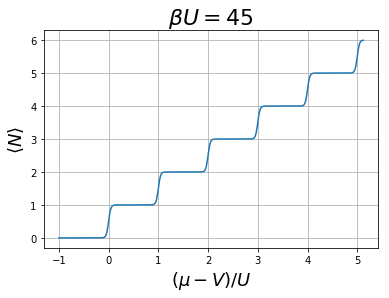

In [75]:
dmulist=arange(-1,10,0.01)
avenlist=[averageN(betaU=45,dmu=mu,maxn=50) for mu in dmulist]
plot(dmulist,avenlist)
xlabel(r"$(\mu-V)/U$",fontsize=18)
ylabel(r"$\langle N\rangle$",fontsize=18)
title(r"$\beta U=45$",fontsize=22)
grid()

<b> Problem 2:</b> Explain (in a sentence or two) why there are steps:

<em> Everytime we add a particle to our system, there is a sharp jump in energy. In this case, as we allow more energy, we allow more particles to exist in a higher state as energy is quantized.</em>

These steps are seen in experiments.  By including additional trapping potentials, you can make the potential $V$ vary with space.  Thus the density, coarse grained over the lattice, has steps. An example is at <a href="http://www.nature.com/nature/journal/v460/n7258/full/nature08244.html">Nature</a>.

<b> Problem 2:</b> Make a plot of $\langle N \rangle$ as a function of $dmu$ for for betamu=10,5,1.  Label each graph with the temperature (as I did above).

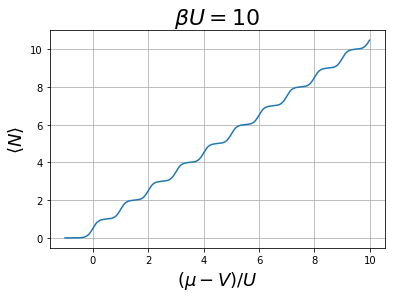

In [76]:
dmulist=arange(-1,10,0.01)
avenlist=[averageN(betaU=10,dmu=mu,maxn=50) for mu in dmulist]
plot(dmulist,avenlist)
xlabel(r"$(\mu-V)/U$",fontsize=18)
ylabel(r"$\langle N\rangle$",fontsize=18)
title(r"$\beta U=10$",fontsize=22)
grid()

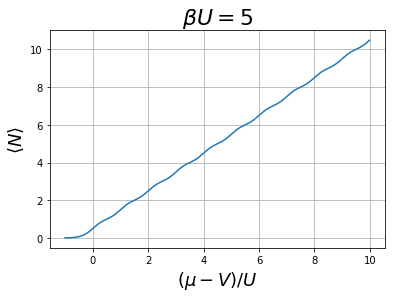

In [77]:
dmulist=arange(-1,10,0.01)
avenlist=[averageN(betaU=5,dmu=mu,maxn=50) for mu in dmulist]
plot(dmulist,avenlist)
xlabel(r"$(\mu-V)/U$",fontsize=18)
ylabel(r"$\langle N\rangle$",fontsize=18)
title(r"$\beta U=5$",fontsize=22)
grid()

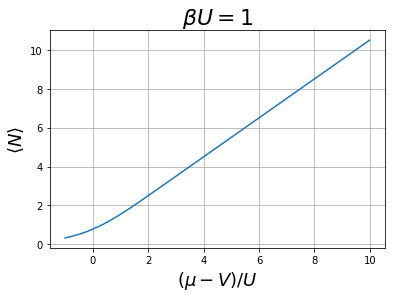

In [78]:
dmulist=arange(-1,10,0.01)
avenlist=[averageN(betaU=1,dmu=mu,maxn=50) for mu in dmulist]
plot(dmulist,avenlist)
xlabel(r"$(\mu-V)/U$",fontsize=18)
ylabel(r"$\langle N\rangle$",fontsize=18)
title(r"$\beta U=1$",fontsize=22)
grid()

<b>Problem 3:</b> Explain why the steps go away at high temperatures.

<em> At higher temperatures, we can treat the system in the classical limit where the energy spacings become a continuum. </em>